<h1>Temporal Difference model</h1>

<h3>Importations</h3>

In [1]:
from bokeh.core.properties import Any, Dict, Instance, String
from bokeh.models import ColumnDataSource, Div, Column,  LayoutDOM
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import numpy as np

import model

#%matplotlib notebook

<h3>Parameters</h3>

In [2]:
n_trials = 400

T = 5
N = 23 # time steps occurrence
γ = 0.98 # discount factor
α = 0.05 # learning rate
λ = 0 # eligibility trace parameter

<h3> Run </h3>

In [3]:
tdmodel = model.TDModel(λ=λ, α=α, γ=γ, N=N, T=T)
for _ in range(n_trials):
    tdmodel.trial()

<h3>Plots 2D</h3>

In [4]:
output_notebook()

X = np.arange(0,T,T/N)
p = figure(title="TD(0.9) Model", x_axis_label="Time steps",
           y_axis_label="Prediction error", y_range=[-0.01,1.4],
           plot_width=400, plot_height=200)
p.line(X, tdmodel.δ_history[-1], line_color="black", line_width=4)
p.circle(20*T/N, 1, size=4, line_color="red", fill_color="red")
p.circle(5*T/N, 1, size=4, line_color="#56BA1B", fill_color="#56BA1B")
p.circle(15*T/N, 1, size=4, line_color="#56BA1B", fill_color="#56BA1B")
show(p)
p2 = figure(title="TD(0.9) Model", x_axis_label="Time steps",
           y_axis_label="Prediction error", y_range=[-0.01,1.4],
           plot_width=400, plot_height=200)
p2.line(X, tdmodel.δ_history[-1], line_color="black", line_width=4)
show(p2)

Loading BokehJS ...

<h3>Plot 3D</h3>

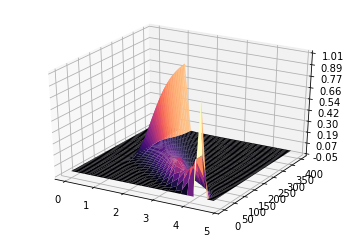

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(0, T, T/N)
Y = np.arange(0, n_trials)
X, Y = np.meshgrid(X, Y)

surface = ax.plot_surface(X, Y, tdmodel.δ_history, cmap=cm.magma, linewidth=0)

ax.set_zlim(-0.05, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#fig.colorbar(surface, shrink=0.5, aspect=5)

plt.show()